### Import Packages

In [1]:
# tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import KFold

print("Packages Imported")

Packages Imported


### Outputs

In [2]:
cwd = os.getcwd()
out_subpath = "output_final"

print("Output Path Set")

Output Path Set


### Load Data

In [4]:
# LOAD DATA
print("\nLoading Files")
data_raw = pd.read_csv('output_sir_monte_carlo_train.csv', delimiter=',', header=None)
data_train = data_raw.to_numpy()
print("\nTraining File Loaded")

indx_p_start = np.where(data_train[0] == 666)[0][0]
indx_i_start = np.where(data_train[0] == 777)[0][0]
indx_end = np.where(data_train[0] == 999)[0][0]


Loading Files

Training File Loaded


### Process Data

In [5]:
n_days = 120

param_start = indx_p_start + 1
param_end = indx_i_start - indx_p_start

i_start = param_end + 1
i_end = i_start + n_days

y_data = data_train[:, param_start:param_end] # actual parameters value
y_data = np.delete(y_data, 2, axis=-1) # remove gamma info
x_raw = data_train[:, i_start:i_end]

# NORMALISE DATA
N = 4500000
x_data = x_raw / N

print("Raw Data Shape:")
print(x_data.shape)
print(y_data.shape)

Raw Data Shape:
(625000, 120)
(625000, 2)


### Run Model

In [9]:
n_fold = 5

MAE_train = []
MAPE_train = []

MAE_test = []
MAPE_test = []

yhat_test_out = []

history_out = []

# RUN K-FOLD
for i, (train_index, test_index) in enumerate(KFold(n_splits=n_fold).split(x_data)):
    print("\n------------------------------")
    print("K = {0}".format(i + 1))
    
    x_train = x_data[train_index]
    x_test = x_data[test_index]

    y_train = y_data[train_index]
    y_test = y_data[test_index]

    print("\nTraining Data:")
    print("X: {0}".format(x_train.shape))
    print("Y: {0}".format(y_train.shape))

    print("\nTesting Data:")
    print("X: {0}".format(x_test.shape))
    print("Y: {0}".format(y_test.shape))
    
    print("")

    n = len(x_train[0]) # length of input array
    o = len(y_train[0]) # length of output array

    # CREATE MODEL
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Input((n, )))
    model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(o, activation=tf.nn.sigmoid))

    # RUN MODEL
    n_epoch = 20
    n_batch = 64
    model1.compile(optimizer='Nadam', loss='mae', metrics=[tf.keras.metrics.mean_absolute_percentage_error]) # model options
    history1 = model1.fit(x_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(x_test, y_test), verbose=1) # run model

    # EVALUATE MODEL
    y_test_hat = model1.predict(x_test, batch_size=n_batch)
    yhat_test_out.append(y_test_hat)

    history_out.append(history1)
    
    train_loss, train_accuracy = model1.evaluate(x_train, y_train, batch_size=n_batch)
    MAE_train.append(train_loss)
    MAPE_train.append(train_accuracy)

    test_loss, test_accuracy = model1.evaluate(x_test, y_test, batch_size=n_batch)
    MAE_test.append(test_loss)
    MAPE_test.append(test_accuracy)

    # SAVE MODEL
    out_file = "model_sir_k{0}".format(i + 1)
    out_path = os.path.join(cwd, out_subpath, out_file)
    model1.save(out_path)
    
print("\nFINISHED")


------------------------------
K = 1

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [==============================] - 12s 1ms/step - loss: 0.0154 - mean_absolute_percentage_error: 54.5779 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 15.9959
Epoch 2/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0028 - mean_absolute_percentage_error: 15.9392 - val_loss: 0.0020 - val_mean_absolute_percentage_error: 14.5283
Epoch 3/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0022 - mean_absolute_percentage_error: 14.3656 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 13.2379
Epoch 4/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0020 - mean_absolute_percentage_error: 13.8104 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 13.3075
Epoch 5/20
7813/7813 [==============================] - 11s 1ms/step - loss: 0.0019 - mean_absolute_pe

1954/1954 [==============================] - 1s 602us/step - loss: 0.0016 - mean_absolute_percentage_error: 12.8043
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\model_sir_k2\assets

------------------------------
K = 3

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [==============================] - 13s 1ms/step - loss: 0.0153 - mean_absolute_percentage_error: 51.8471 - val_loss: 0.0034 - val_mean_absolute_percentage_error: 16.6581
Epoch 2/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0029 - mean_absolute_percentage_error: 16.1346 - val_loss: 0.0023 - val_mean_absolute_percentage_error: 13.6978
Epoch 3/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0022 - mean_absolute_percentage_error: 14.2862 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 13.9144
Epoch 4/20
7813/7813 [=========

7813/7813 [==============================] - 9s 1ms/step - loss: 0.0016 - mean_absolute_percentage_error: 12.2765 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 14.6888
Epoch 18/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0016 - mean_absolute_percentage_error: 12.2719 - val_loss: 0.0015 - val_mean_absolute_percentage_error: 13.0240
Epoch 19/20
7813/7813 [==============================] - 10s 1ms/step - loss: 0.0015 - mean_absolute_percentage_error: 11.9094 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 13.6935
Epoch 20/20
1954/1954 [==============================] - 1s 593us/step - loss: 0.0015 - mean_absolute_percentage_error: 12.7667
INFO:tensorflow:Assets written to: C:\Users\Yuriy\Google Drive\College\Masters\Thesis\Code\Implementation\SIR_NN\output_final\model_sir_k4\assets

------------------------------
K = 5

Training Data:
X: (500000, 120)
Y: (500000, 2)

Testing Data:
X: (125000, 120)
Y: (125000, 2)

Epoch 1/20
7813/7813 [=======

### Output Results

Final Test MA/MAPE
------------------------------
K 		 Train MAE 	 Train MAPE 	 Test MAE 	 Test MAPE
1 		 0.001432 	 11.474941 	 0.001415 	 11.388986
2 		 0.001573 	 12.693851 	 0.001587 	 12.804290
3 		 0.001446 	 11.533605 	 0.001459 	 11.747021
4 		 0.001509 	 12.858372 	 0.001508 	 12.766737
5 		 0.001389 	 11.692501 	 0.001376 	 11.507944

Mean 		 0.001470 	 12.050654 	 0.001469 	 12.042995
Median 		 0.001446 	 11.692501 	 0.001459 	 11.747021

Train MAPE
------------------------------


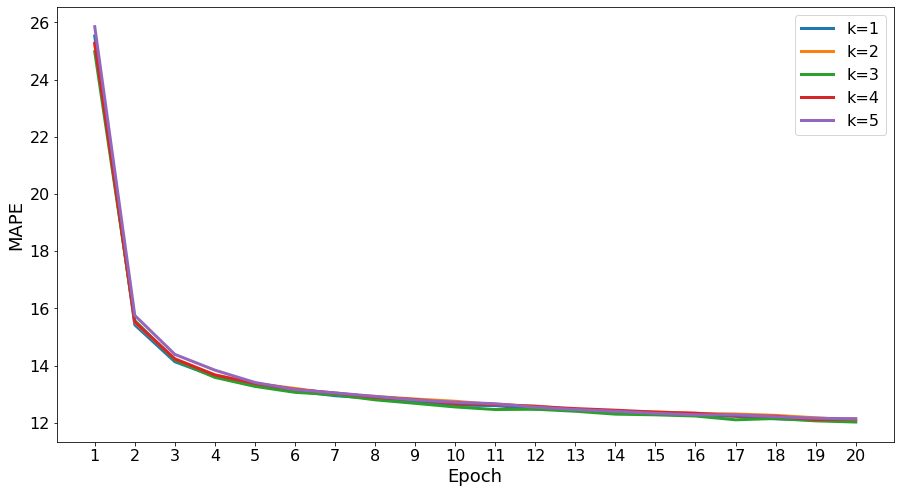


Test MAPE
------------------------------


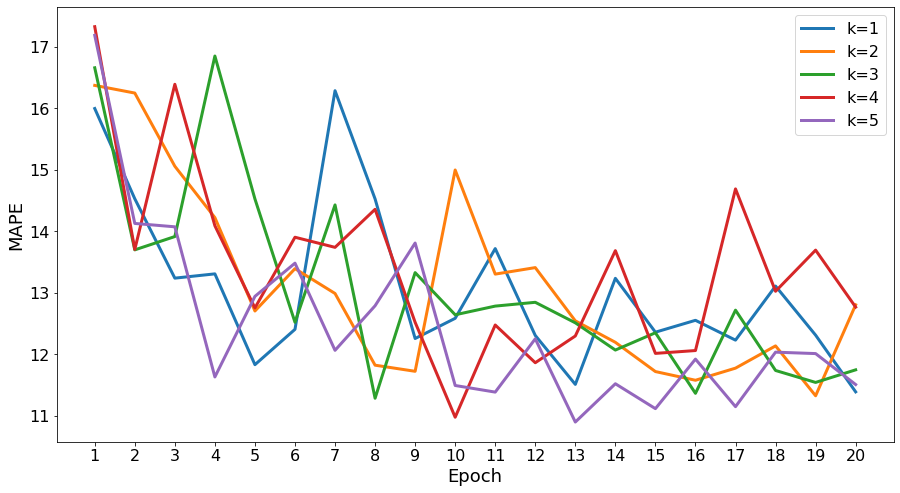


Average Train/Test MAPE
------------------------------

Epoch 		 Train MAPE 	 Valid MAPE
1 		 25.37 		 16.71
2 		 15.56 		 14.46
3 		 14.23 		 14.53
4 		 13.67 		 14.02
5 		 13.34 		 12.95
6 		 13.14 		 13.14
7 		 13.0 		 13.9
8 		 12.88 		 12.96
9 		 12.77 		 12.73
10 		 12.66 		 12.54
11 		 12.6 		 12.73
12 		 12.53 		 12.53
13 		 12.45 		 11.95
14 		 12.38 		 12.54
15 		 12.33 		 11.91
16 		 12.28 		 11.9
17 		 12.23 		 12.51
18 		 12.19 		 12.41
19 		 12.12 		 12.18
20 		 12.08 		 12.04


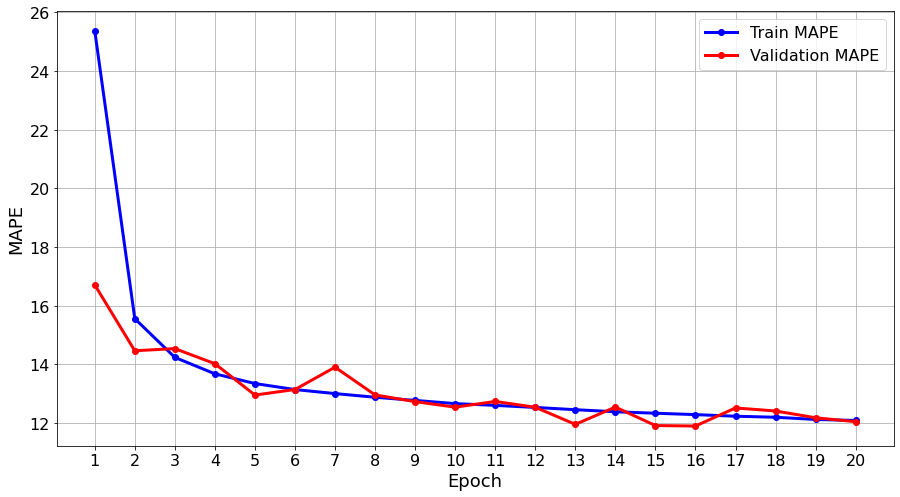

In [13]:
# PRINT FINAL K-FOLD TEST / TRAIN MAE's/MAPE's
print("Final Test MA/MAPE")
print("------------------------------")

print("K \t\t Train MAE \t Train MAPE \t Test MAE \t Test MAPE")
for i in range(0, n_fold):
    print("{0} \t\t {1:.6f} \t {2:.6f} \t {3:.6f} \t {4:.6f}".format(i + 1, MAE_train[i], MAPE_train[i], MAE_test[i], MAPE_test[i]))

print("\n{0} \t\t {1:.6f} \t {2:.6f} \t {3:.6f} \t {4:.6f}".format("Mean", np.average(MAE_train), np.average(MAPE_train), np.average(MAE_test), np.average(MAPE_test)))
print("{0} \t\t {1:.6f} \t {2:.6f} \t {3:.6f} \t {4:.6f}".format("Median", np.median(MAE_train), np.median(MAPE_train), np.median(MAE_test), np.median(MAPE_test)))

epochs = np.linspace(1, n_epoch, num=n_epoch)

# PLOT ALL K-FOLD TRAIN MAPEs
print("\nTrain MAPE")
print("------------------------------")

plt.figure(figsize=(15,8)) # plot all k-fold MAPEs

for i in range(0, n_fold):
    train_mape = history_out[i].history["mean_absolute_percentage_error"]
    plt.plot(epochs, train_mape, linewidth=3, label="k={0}".format(i + 1))

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# PLOT ALL K-FOLD TEST MAPEs
print("\nTest MAPE")
print("------------------------------")

plt.figure(figsize=(15,8)) # plot all k-fold MAPEs

for i in range(0, n_fold):
    test_mape = history_out[i].history["val_mean_absolute_percentage_error"]
    plt.plot(epochs, test_mape, linewidth=3, label="k={0}".format(i + 1))

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# PRINT AVERAGE K-FOLD TEST MAPE's
print("\nAverage Train/Test MAPE")
print("------------------------------")

train_mape_average = []
test_mape_average = []

print("\nEpoch \t\t Train MAPE \t Valid MAPE")

for e in range(0, n_epoch):
    train_mape_average_i = [history_out[i].history["mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    train_mape = np.average(train_mape_average_i)
    train_mape_average.append(train_mape)

    test_mape_average_i = [history_out[i].history["val_mean_absolute_percentage_error"][e] for i in range(0, n_fold)]
    test_mape = np.average(test_mape_average_i)
    test_mape_average.append(test_mape)

    print("{0} \t\t {1:.4} \t\t {2:.4}".format(e + 1, train_mape, test_mape))

# PLOT AVERAGE K-FOLD TEST MAPE
plt.figure(figsize=(15,8)) 
plt.plot(epochs, train_mape_average, "-ob", linewidth=3, label="Train MAPE")
plt.plot(epochs, test_mape_average, "-or", linewidth=3, label="Validation MAPE")
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("MAPE", fontsize=18)
plt.xticks(epochs, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()